# Clustering

In [1]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt


In [4]:
file_path = "../data/processed/adult.data"
df = pd.read_csv(file_path)

In [5]:
X = df.drop(columns=["income"]).copy()
X_matrix = X.to_numpy()

Ya que tenemos los datos preprocesados y las variables categóricas con one-hot encoding, podemos aplicar K-Prototypes para realizar clustering.

In [6]:
categorical_cols = [i for i, col in enumerate(X.columns) if X[col].nunique() <= 2]

In [8]:
costs = []
K_range = range(2, 10)

for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=21562, n_init=5)
    kproto.fit_predict(X_matrix, categorical=categorical_cols)
    costs.append(kproto.cost_)


: 

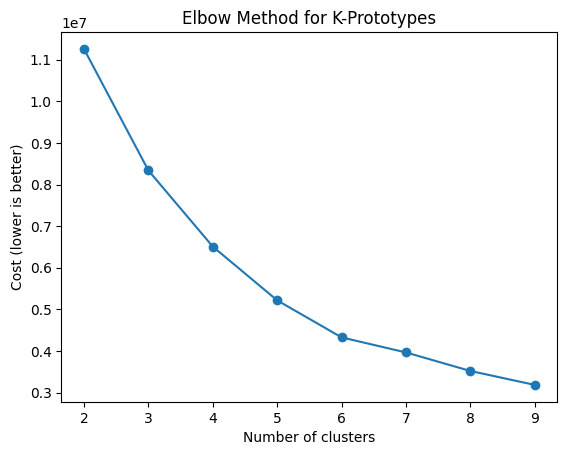

In [35]:
plt.plot(K_range, costs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for K-Prototypes')
plt.show()

El número óptimo de clusters es `6`.

In [6]:
kproto = KPrototypes(n_clusters=6, init='Huang', random_state=21562, n_init=5)
clusters = kproto.fit_predict(X_matrix, categorical=categorical_cols)
df['cluster'] = clusters
df['cluster'] = df['cluster'].astype('category')

In [8]:
# Numeric centroids (mean values of numeric columns)
numeric_centroids = kproto.cluster_centroids_[:, :len(X.columns) - len(categorical_cols)]

# Categorical centroids (mode values of categorical columns)
categorical_centroids = kproto.cluster_centroids_[:, len(X.columns) - len(categorical_cols):]

In [ ]:
numeric_cols = [col for col in X.columns if col not in X.columns[categorical_cols]]
categorical_cols_names = [X.columns[i] for i in categorical_cols]

# Numeric part
numeric_df = pd.DataFrame(numeric_centroids, columns=numeric_cols)

# Categorical part
categorical_df = pd.DataFrame(categorical_centroids, columns=categorical_cols_names)

# Combine
centroids_df = pd.concat([numeric_df, categorical_df], axis=1)
centroids_df['cluster'] = range(kproto.n_clusters)
centroids_df

,age,education-num,hours-per-week,capital-gain,capital-loss,workclass_Local-gov,workclass_Never-worked,workclass_Non-specific,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Other-relative,relationship_Own-child,relationship_Spouse,race_Other,race_White,sex_Male,native-country_United-States,cluster
0,40.630322,10.449360,41.384701,0.054251,0.030733,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0
1,64.054067,9.429187,17.262201,0.029021,-0.051054,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1
2,26.566421,9.916194,41.273276,-0.127827,-0.059958,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2
3,56.759614,9.837791,41.936402,0.140631,0.057726,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3
4,40.041519,10.875000,64.529973,0.168973,0.111946,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4
5,23.448200,9.435928,20.481593,-0.207013,-0.100453,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5


In [ ]:
numeric_cols = ["age", "education-num", "hours-per-week", "capital-gain", "capital-loss"]
categorical_cols = [col for col in centroids_df.columns if col not in numeric_cols + ["cluster", ""]]

def describe_cluster(row):
    desc = f"Cluster {int(row['cluster'])}:\n"
    # Numeric features
    for col in numeric_cols:
        desc += f"  - {col}: {row[col]:.1f}\n"
    # Categorical features (one-hot encoded)
    for col in categorical_cols:
        proportion = row[col]
        if proportion > 0.5:  # more than 50% of cluster members
            desc += f"  - Mostly {col.replace('_', ' ')}\n"
    return desc

profiles = centroids_df.apply(describe_cluster, axis=1)
for p in profiles:
    print(p)


Cluster 0:
  - age: 40.6
  - education-num: 10.4
  - hours-per-week: 41.4
  - capital-gain: 0.1
  - capital-loss: 0.0
  - Mostly workclass Private
  - Mostly marital-status Married-civ-spouse
  - Mostly relationship Spouse
  - Mostly race White
  - Mostly sex Male
  - Mostly native-country United-States

Cluster 1:
  - age: 64.1
  - education-num: 9.4
  - hours-per-week: 17.3
  - capital-gain: 0.0
  - capital-loss: -0.1
  - Mostly marital-status Married-civ-spouse
  - Mostly relationship Spouse
  - Mostly race White
  - Mostly sex Male
  - Mostly native-country United-States

Cluster 2:
  - age: 26.6
  - education-num: 9.9
  - hours-per-week: 41.3
  - capital-gain: -0.1
  - capital-loss: -0.1
  - Mostly workclass Private
  - Mostly marital-status Never-married
  - Mostly race White
  - Mostly sex Male
  - Mostly native-country United-States

Cluster 3:
  - age: 56.8
  - education-num: 9.8
  - hours-per-week: 41.9
  - capital-gain: 0.1
  - capital-loss: 0.1
  - Mostly workclass Private


## Análisis de Clusters

## Observaciones

### 1. Diferencias numéricas
- **Edad**: varía aproximadamente entre 23 (Cluster 5) y 64 (Cluster 1). La edad parece ser un factor que define algunos clusters.
- **Horas por semana**: la mayoría de los clusters están alrededor de 40–42 horas/semana, excepto:
  - Cluster 1: ~17 horas/semana (mucho menor → probablemente tiempo parcial o jubilados)
  - Cluster 4: ~64.5 horas/semana (mucho mayor → sobrecarga de trabajo)
- **Nivel educativo** (`education-num`): varía entre 9.4 y 10.9. Este rango es pequeño; la educación no separa fuertemente los clusters.

### 2. Diferencias categóricas
- La mayoría de los clusters están dominados por **workclass Private**, **race White**, **sex Male** y **native-country United-States**, así como **relationship Spouse o Own-child**.
  → La variación categórica es limitada.
- Diferencias aparecen en **estado civil** y **relación**:
  - Clusters 2 y 5: Nunca casados, jóvenes; Cluster 5 tiene `Own-child`.
  - Cluster 1: Casado con pocas horas → posiblemente jubilados o semi-jubilados.
  - Cluster 4: Casado con muchas horas → adultos sobrecargados de trabajo.
- Workclass varía poco, casi todos son Private; por lo tanto, no es un diferenciador importante.

### 3. Resumen de clusters
- **Cluster 0**: Adultos de mediana edad, horas promedio (~41), casados, con cónyuge presente. Adultos trabajadores típicos del sector privado.
- **Cluster 1**: Adultos mayores, pocas horas (~17), casados, cónyuge presente. Posiblemente jubilados o trabajadores a tiempo parcial.
- **Cluster 2**: Jóvenes (~26), horas promedio, nunca casados. Adultos jóvenes solteros.
- **Cluster 3**: Adultos de mediana edad a mayores (~57), horas promedio, casados. Muy similar al Cluster 0; diferencia principal es la edad.
- **Cluster 4**: Adultos de mediana edad (~40), muchas horas (~64.5), casados. Adultos del sector privado con sobrecarga de trabajo.
- **Cluster 5**: Adultos muy jóvenes (~23), pocas horas (~20.5), nunca casados, con hijos. Probablemente padres jóvenes trabajando a tiempo parcial.

## ¿Son suficientemente diferentes?
- **Sí, en parte**:
  - Las características numéricas como **edad** y **horas por semana** crean clusters distintos (especialmente Clusters 1, 4 y 5).
  - Los Clusters 0 y 3 son muy similares — adultos de mediana edad, casados, trabajando ~40–42 horas/semana — por lo que podrían considerarse casi redundantes.
  - Las variables categóricas (como workclass, raza y sexo) son bastante homogéneas y no contribuyen mucho a la diferenciación.

**Interpretación**: K-Prototypes ha identificado clusters principalmente basados en **edad e intensidad laboral**, con algunas distinciones en estado civil y relación. Las características categóricas fueron demasiado uniformes para generar una fuerte diferenciación.


# Predicción de Income

In [14]:
# Export the DataFrame with clusters
df.to_csv("../data/processed/adult_with_clusters.data", index=False)

Se pretender evaluar por medio de los cluster una medjor predicción, que elimine los sesgos basados en variables como la edad, actividad laboral, entre otros. Cada elemento dentro del cluster presenta similitud con k-distancias significativas. Por lo tanto, utilizando Xgboost se pretende predecir el income, con la hipótesis de ser mejor que un modelo aplicado a todo el conjunto de datos, el cual es desbalanceado. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

In [21]:
file_path = "../data/processed/adult_with_clusters.data"
df = pd.read_csv(file_path)

In [27]:
# Parámetros generales
RANDOM_STATE = 42
TEST_SIZE = 0.30

 Predicción de income en cada uno de los clusters. Junto a sus métricas y matriz de confusión respectivas, para el set de entrenamiento y testeo para validar la similitud del modelo. 


================= Cluster 0 =================

--- Métricas (Train) ---
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      6774
        >50K       0.83      0.72      0.77      3337

    accuracy                           0.86     10111
   macro avg       0.85      0.82      0.84     10111
weighted avg       0.86      0.86      0.86     10111


--- Métricas (Test) ---
              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      2904
        >50K       0.78      0.67      0.72      1430

    accuracy                           0.83      4334
   macro avg       0.81      0.79      0.80      4334
weighted avg       0.83      0.83      0.83      4334



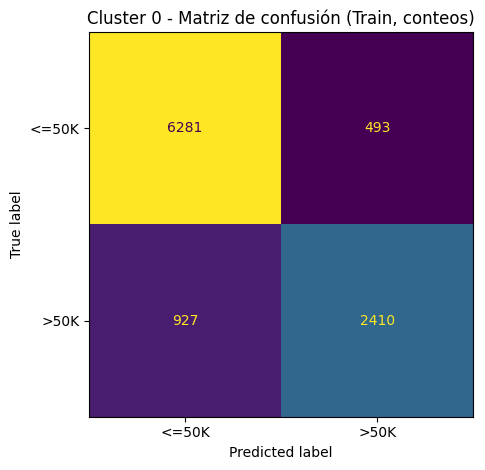

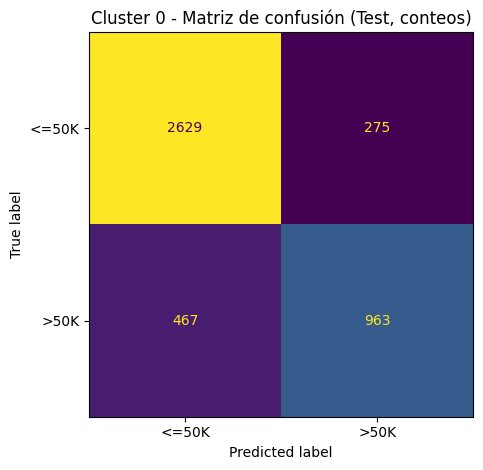

In [29]:
CLUSTER_VALUE = 0  
df_c = df[df["cluster"] == CLUSTER_VALUE].copy()


X = df_c.drop(columns=["income", "cluster"])
y = df_c["income"]  # binaria: 0 o 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Modelo XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=RANDOM_STATE,
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Métricas
print(f"\n================= Cluster {CLUSTER_VALUE} =================")
print("\n--- Métricas (Train) ---")
print(classification_report(y_train, y_pred_train, target_names=["<=50K", ">50K"]))
print("\n--- Métricas (Test) ---")
print(classification_report(y_test, y_pred_test, target_names=["<=50K", ">50K"]))

# Matriz de confusión normalizada - TRAIN
fig, ax = plt.subplots()
cm_train = confusion_matrix(y_train, y_pred_train)  # sin normalize
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=["<=50K", ">50K"])
disp_train.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Train, conteos)")
plt.tight_layout()
plt.show()

# Matriz de confusión (conteos) - TEST
fig, ax = plt.subplots()
cm_test = confusion_matrix(y_test, y_pred_test)  # sin normalize
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=["<=50K", ">50K"])
disp_test.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Test, conteos)")
plt.tight_layout()
plt.show()


================= Cluster 1 =================

--- Métricas (Train) ---
              precision    recall  f1-score   support

       <=50K       0.96      1.00      0.98      1271
        >50K       0.97      0.76      0.85       192

    accuracy                           0.97      1463
   macro avg       0.97      0.88      0.92      1463
weighted avg       0.97      0.97      0.96      1463


--- Métricas (Test) ---
              precision    recall  f1-score   support

       <=50K       0.91      0.98      0.95       545
        >50K       0.74      0.38      0.50        82

    accuracy                           0.90       627
   macro avg       0.83      0.68      0.72       627
weighted avg       0.89      0.90      0.89       627



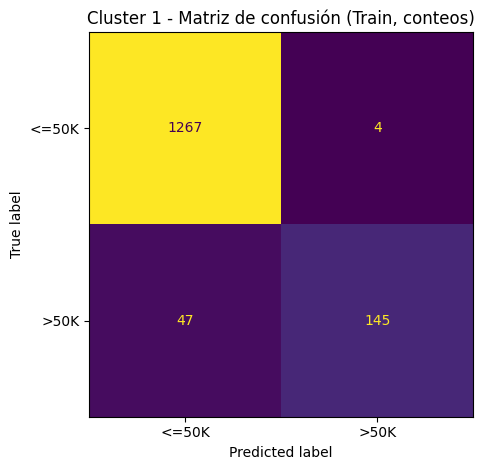

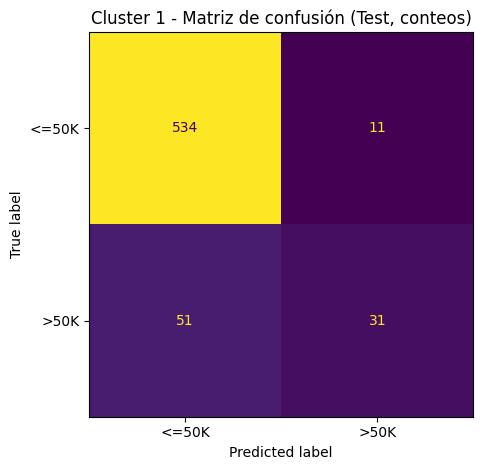

In [30]:
CLUSTER_VALUE = 1  
df_c = df[df["cluster"] == CLUSTER_VALUE].copy()


X = df_c.drop(columns=["income", "cluster"])
y = df_c["income"]  # binaria: 0 o 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Modelo XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=RANDOM_STATE,
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Métricas
print(f"\n================= Cluster {CLUSTER_VALUE} =================")
print("\n--- Métricas (Train) ---")
print(classification_report(y_train, y_pred_train, target_names=["<=50K", ">50K"]))
print("\n--- Métricas (Test) ---")
print(classification_report(y_test, y_pred_test, target_names=["<=50K", ">50K"]))

# Matriz de confusión normalizada - TRAIN
fig, ax = plt.subplots()
cm_train = confusion_matrix(y_train, y_pred_train)  # sin normalize
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=["<=50K", ">50K"])
disp_train.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Train, conteos)")
plt.tight_layout()
plt.show()

# Matriz de confusión (conteos) - TEST
fig, ax = plt.subplots()
cm_test = confusion_matrix(y_test, y_pred_test)  # sin normalize
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=["<=50K", ">50K"])
disp_test.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Test, conteos)")
plt.tight_layout()
plt.show()


================= Cluster 2 =================

--- Métricas (Train) ---
              precision    recall  f1-score   support

       <=50K       0.95      0.99      0.97      8832
        >50K       0.84      0.57      0.68      1032

    accuracy                           0.94      9864
   macro avg       0.90      0.78      0.83      9864
weighted avg       0.94      0.94      0.94      9864


--- Métricas (Test) ---
              precision    recall  f1-score   support

       <=50K       0.94      0.98      0.96      3786
        >50K       0.75      0.44      0.56       442

    accuracy                           0.93      4228
   macro avg       0.84      0.71      0.76      4228
weighted avg       0.92      0.93      0.92      4228



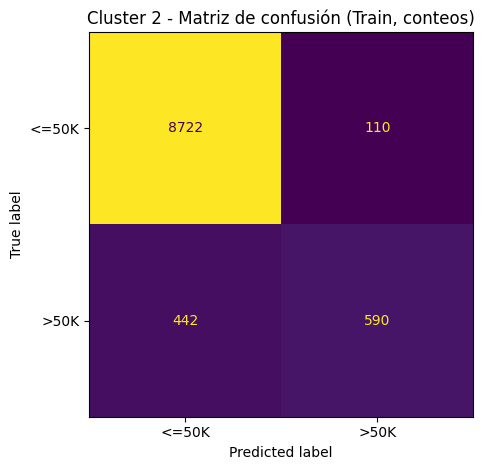

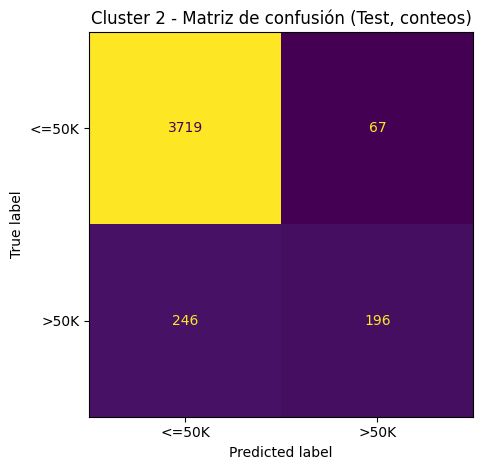

In [31]:
CLUSTER_VALUE = 2  
df_c = df[df["cluster"] == CLUSTER_VALUE].copy()


X = df_c.drop(columns=["income", "cluster"])
y = df_c["income"]  # binaria: 0 o 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Modelo XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=RANDOM_STATE,
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Métricas
print(f"\n================= Cluster {CLUSTER_VALUE} =================")
print("\n--- Métricas (Train) ---")
print(classification_report(y_train, y_pred_train, target_names=["<=50K", ">50K"]))
print("\n--- Métricas (Test) ---")
print(classification_report(y_test, y_pred_test, target_names=["<=50K", ">50K"]))

# Matriz de confusión normalizada - TRAIN
fig, ax = plt.subplots()
cm_train = confusion_matrix(y_train, y_pred_train)  # sin normalize
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=["<=50K", ">50K"])
disp_train.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Train, conteos)")
plt.tight_layout()
plt.show()

# Matriz de confusión (conteos) - TEST
fig, ax = plt.subplots()
cm_test = confusion_matrix(y_test, y_pred_test)  # sin normalize
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=["<=50K", ">50K"])
disp_test.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Test, conteos)")
plt.tight_layout()
plt.show()


================= Cluster 3 =================

--- Métricas (Train) ---
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      3910
        >50K       0.84      0.73      0.78      2187

    accuracy                           0.85      6097
   macro avg       0.85      0.83      0.84      6097
weighted avg       0.85      0.85      0.85      6097


--- Métricas (Test) ---
              precision    recall  f1-score   support

       <=50K       0.83      0.90      0.86      1677
        >50K       0.80      0.66      0.72       937

    accuracy                           0.82      2614
   macro avg       0.81      0.78      0.79      2614
weighted avg       0.82      0.82      0.81      2614



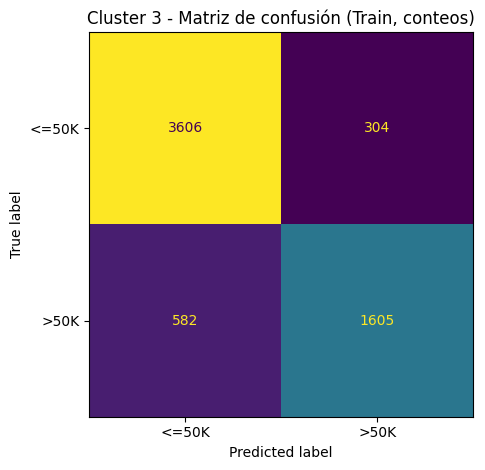

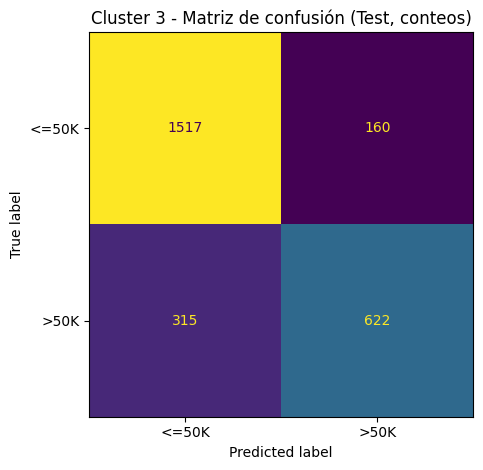

In [32]:
CLUSTER_VALUE = 3  
df_c = df[df["cluster"] == CLUSTER_VALUE].copy()


X = df_c.drop(columns=["income", "cluster"])
y = df_c["income"]  # binaria: 0 o 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Modelo XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=RANDOM_STATE,
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Métricas
print(f"\n================= Cluster {CLUSTER_VALUE} =================")
print("\n--- Métricas (Train) ---")
print(classification_report(y_train, y_pred_train, target_names=["<=50K", ">50K"]))
print("\n--- Métricas (Test) ---")
print(classification_report(y_test, y_pred_test, target_names=["<=50K", ">50K"]))

# Matriz de confusión normalizada - TRAIN
fig, ax = plt.subplots()
cm_train = confusion_matrix(y_train, y_pred_train)  # sin normalize
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=["<=50K", ">50K"])
disp_train.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Train, conteos)")
plt.tight_layout()
plt.show()

# Matriz de confusión (conteos) - TEST
fig, ax = plt.subplots()
cm_test = confusion_matrix(y_test, y_pred_test)  # sin normalize
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=["<=50K", ">50K"])
disp_test.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Test, conteos)")
plt.tight_layout()
plt.show()


================= Cluster 4 =================

--- Métricas (Train) ---
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      1818
        >50K       0.89      0.81      0.85      1334

    accuracy                           0.88      3152
   macro avg       0.88      0.87      0.87      3152
weighted avg       0.88      0.88      0.88      3152


--- Métricas (Test) ---
              precision    recall  f1-score   support

       <=50K       0.78      0.83      0.80       780
        >50K       0.75      0.67      0.71       572

    accuracy                           0.76      1352
   macro avg       0.76      0.75      0.76      1352
weighted avg       0.76      0.76      0.76      1352



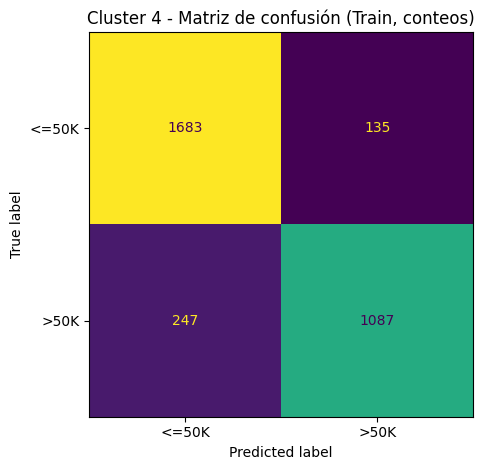

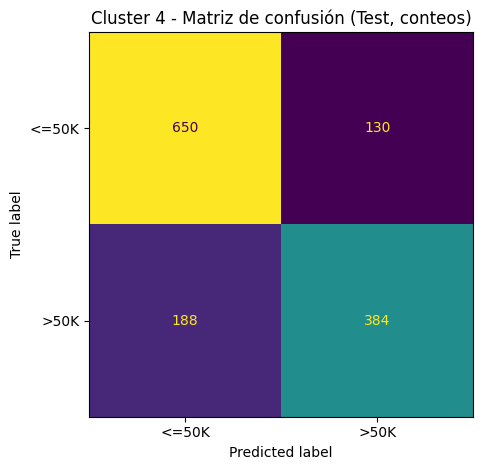

In [33]:
CLUSTER_VALUE = 4  
df_c = df[df["cluster"] == CLUSTER_VALUE].copy()


X = df_c.drop(columns=["income", "cluster"])
y = df_c["income"]  # binaria: 0 o 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Modelo XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=RANDOM_STATE,
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Métricas
print(f"\n================= Cluster {CLUSTER_VALUE} =================")
print("\n--- Métricas (Train) ---")
print(classification_report(y_train, y_pred_train, target_names=["<=50K", ">50K"]))
print("\n--- Métricas (Test) ---")
print(classification_report(y_test, y_pred_test, target_names=["<=50K", ">50K"]))

# Matriz de confusión normalizada - TRAIN
fig, ax = plt.subplots()
cm_train = confusion_matrix(y_train, y_pred_train)  # sin normalize
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=["<=50K", ">50K"])
disp_train.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Train, conteos)")
plt.tight_layout()
plt.show()

# Matriz de confusión (conteos) - TEST
fig, ax = plt.subplots()
cm_test = confusion_matrix(y_test, y_pred_test)  # sin normalize
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=["<=50K", ">50K"])
disp_test.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Test, conteos)")
plt.tight_layout()
plt.show()


================= Cluster 5 =================

--- Métricas (Train) ---
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      3381
        >50K       0.99      0.86      0.92        98

    accuracy                           1.00      3479
   macro avg       0.99      0.93      0.96      3479
weighted avg       1.00      1.00      1.00      3479


--- Métricas (Test) ---
              precision    recall  f1-score   support

       <=50K       0.98      0.99      0.99      1450
        >50K       0.62      0.43      0.51        42

    accuracy                           0.98      1492
   macro avg       0.80      0.71      0.75      1492
weighted avg       0.97      0.98      0.97      1492



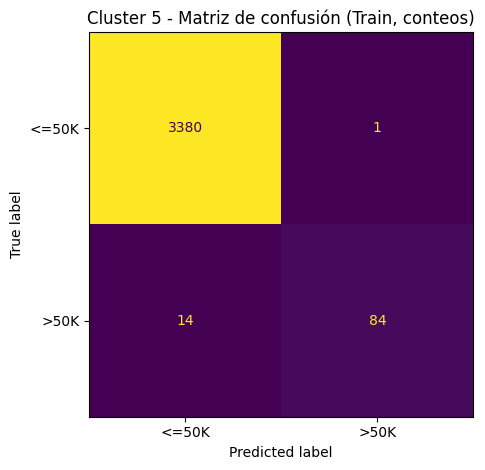

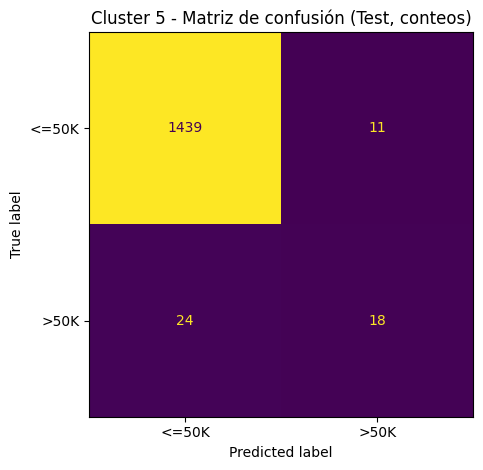

In [34]:
CLUSTER_VALUE = 5  
df_c = df[df["cluster"] == CLUSTER_VALUE].copy()


X = df_c.drop(columns=["income", "cluster"])
y = df_c["income"]  # binaria: 0 o 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Modelo XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=RANDOM_STATE,
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9
)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Métricas
print(f"\n================= Cluster {CLUSTER_VALUE} =================")
print("\n--- Métricas (Train) ---")
print(classification_report(y_train, y_pred_train, target_names=["<=50K", ">50K"]))
print("\n--- Métricas (Test) ---")
print(classification_report(y_test, y_pred_test, target_names=["<=50K", ">50K"]))

# Matriz de confusión normalizada - TRAIN
fig, ax = plt.subplots()
cm_train = confusion_matrix(y_train, y_pred_train)  # sin normalize
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=["<=50K", ">50K"])
disp_train.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Train, conteos)")
plt.tight_layout()
plt.show()

# Matriz de confusión (conteos) - TEST
fig, ax = plt.subplots()
cm_test = confusion_matrix(y_test, y_pred_test)  # sin normalize
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=["<=50K", ">50K"])
disp_test.plot(ax=ax, values_format="d", colorbar=False)  # valores enteros
ax.set_title(f"Cluster {CLUSTER_VALUE} - Matriz de confusión (Test, conteos)")
plt.tight_layout()
plt.show()